## Загрузим нужные библиотеки

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

%matplotlib inline

In [41]:
df = pd.read_csv("/content/train.csv", nrows = 100000)

## Рассмотрим датасет по ближе

In [42]:
df.head(3)

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,F94EDC107A4E054786882F9453C1B93F,Пропуск FacePay,184,Молодёжная (Западный),3010.0,Молодёжная,3.0,Арбатско-Покровская,2022-09-12 05:00:45,475.050000,3010
1,2,8F13BFBA98A7DD34B11BD2DDCC5CA68E,СК студента 30 дней,110,Войковская ( Южный ),2006.0,Войковская,2.0,Замоскворецкая,2022-09-12 05:00:52,647.216667,2006
2,3,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006.0,Войковская,2.0,Замоскворецкая,2022-09-12 05:00:54,648.183333,2006


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   ticket_id       100000 non-null  object 
 2   ticket_type_nm  100000 non-null  object 
 3   entrance_id     100000 non-null  int64  
 4   entrance_nm     100000 non-null  object 
 5   station_id      100000 non-null  float64
 6   station_nm      100000 non-null  object 
 7   line_id         100000 non-null  float64
 8   line_nm         100000 non-null  object 
 9   pass_dttm       100000 non-null  object 
 10  time_to_under   100000 non-null  float64
 11  label           100000 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 9.2+ MB


Посмотрим на распределение двух основных величин 

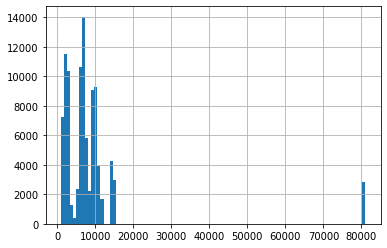

In [44]:
df["label"].hist(bins = 100)

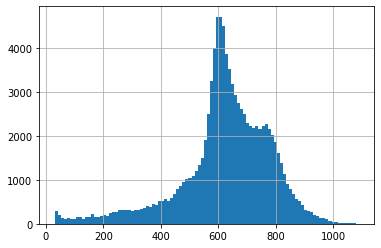

In [45]:
df["time_to_under"].hist(bins = 100)

Найдем наиболее популярную станцию

In [46]:
df["label"].value_counts()

3022     2226
7009     1870
8003     1779
15002    1704
8004     1583
         ... 
4008        7
9004        6
13003       2
13005       1
13001       1
Name: label, Length: 273, dtype: int64

In [47]:
df[df["label"] == int(df["label"].value_counts().index[0])].head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
436,437,8A5D7CEF3547CCB78A63FC6B0F8D70D3,30 дней ЕДИНЫЙ ТК,153,Щёлковская ( Северный ),3022.0,Щёлковская,3.0,Арбатско-Покровская,2022-09-12 05:30:28,190.533333,3022
507,508,D667E06F3E3C244546C48B2280CCECBC,30 дней ЕДИНЫЙ ТК,153,Щёлковская ( Северный ),3022.0,Щёлковская,3.0,Арбатско-Покровская,2022-09-12 05:30:45,766.683333,3022
802,803,024E6435803F22B87BCD6CFA69E94C0C,30 дней ЕДИНЫЙ ТК,154,Щёлковская ( Южный ),3022.0,Щёлковская,3.0,Арбатско-Покровская,2022-09-12 05:33:36,200.333333,3022
803,804,18182486FF5FD3BAD5BCC2D5AA5C77D7,КОШЕЛЕК,153,Щёлковская ( Северный ),3022.0,Щёлковская,3.0,Арбатско-Покровская,2022-09-12 05:33:37,573.933333,3022
1038,1039,82D5FB069CF4A69298E5281D063EE9FF,90 дней ЕДИНЫЙ ТК,153,Щёлковская ( Северный ),3022.0,Щёлковская,3.0,Арбатско-Покровская,2022-09-12 05:36:14,1065.150000,3022


Сделаем категорию **"ticket_type_nm"** раноговой 

In [48]:
df["ticket_type_nm"].value_counts()

КОШЕЛЕК                                                   23377
30 дней ЕДИНЫЙ ТК                                         18494
Социальная карта москвича                                 11377
30 дней                                                   10923
90 дней ЕДИНЫЙ ТК                                          6034
60 поездок ЕДИНЫЙ ТК                                       5186
30 дней Пригород ТК                                        4766
30 дней СК студента                                        2586
СК студента 30 дней                                        2333
365 дней ЕДИНЫЙ ТК                                         2162
30 дней СК учащегося                                       2071
ББК                                                        1983
СК учащегося 30 дней                                       1592
Социальная карта жителя Моск. области                      1541
90 дней                                                    1161
Пропуск FacePay                         

In [51]:
df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
df["ticket_type_nm"].astype('category').cat.codes
df["ticket_type_nm"] = df["ticket_type_nm"].cat.codes

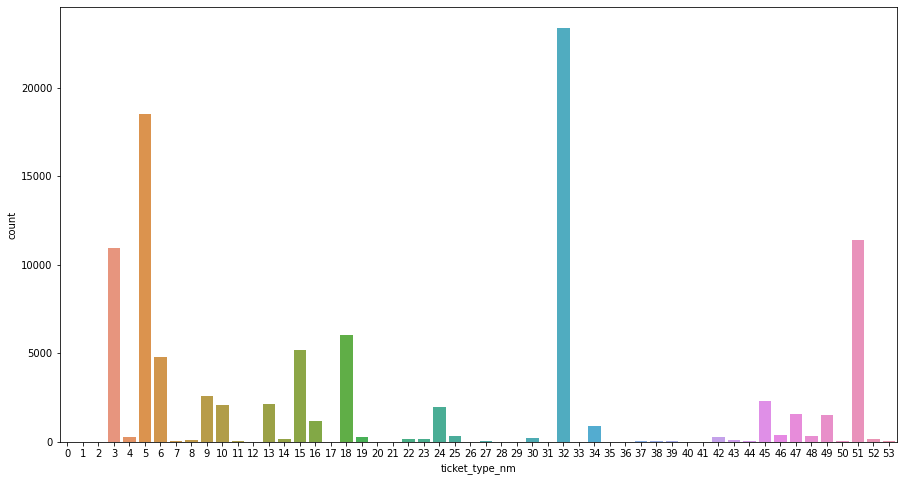

In [52]:
plt.figure(figsize=(15,8))
sns.countplot(x = "ticket_type_nm" , data  = df)  

Кажется нет четкой зависимости между категорией билета и временем между заходи на станцию

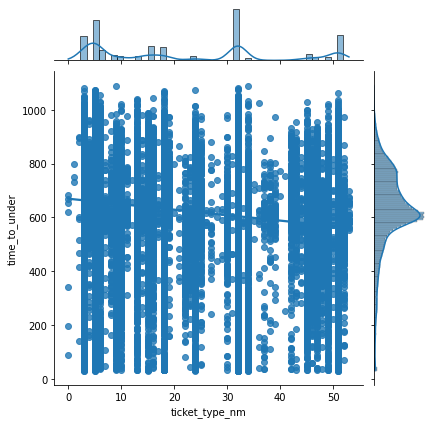

In [53]:
sns.jointplot(x = "ticket_type_nm", y = 'time_to_under', data = df, kind = 'reg')

Видоизменим категорию **"pass_dttm"**  

In [62]:
df["day"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[0]))
df["hours"] = df.pass_dttm.map(lambda x: int(x.split("-")[2].split(" ")[1].split(":")[0]))

Добавим новый столбец в датсет и взглянем на то что у нас получилось

In [63]:
df.head(3)

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label,day,hours
0,1,F94EDC107A4E054786882F9453C1B93F,34,184,Молодёжная (Западный),3010.0,Молодёжная,3.0,Арбатско-Покровская,2022-09-12 05:00:45,475.050000,3010,12,5
1,2,8F13BFBA98A7DD34B11BD2DDCC5CA68E,45,110,Войковская ( Южный ),2006.0,Войковская,2.0,Замоскворецкая,2022-09-12 05:00:52,647.216667,2006,12,5
2,3,126727A96489CC976A8C08E5CEB00542,47,110,Войковская ( Южный ),2006.0,Войковская,2.0,Замоскворецкая,2022-09-12 05:00:54,648.183333,2006,12,5


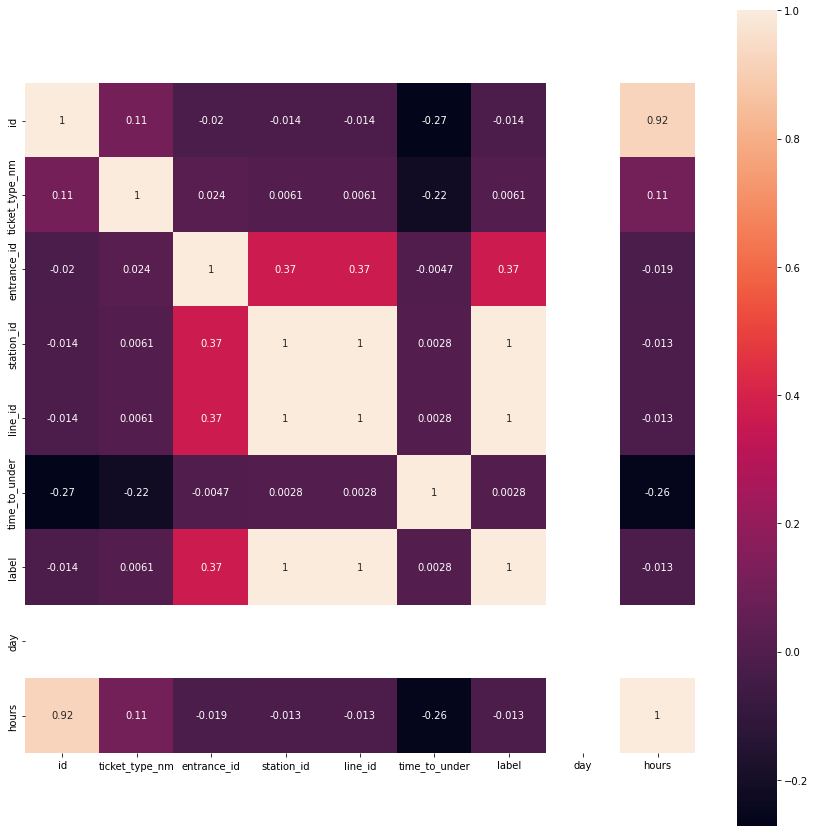

In [64]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [87]:
X = df.drop(["ticket_id", "entrance_nm", "station_nm", "line_nm", "pass_dttm", "label","time_to_under"], axis = 1)
y = df[["time_to_under", "label"]]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
y_train

,time_to_under,label
76513,632.550000,12002
60406,772.600000,10018
27322,704.883333,1011
53699,569.850000,9023
65412,602.950000,8005
...,...,...
6265,972.816667,3022
54886,611.766667,10018
76820,600.033333,9019
860,721.450000,3016


## Обучение модели

Для станции 

In [75]:
clf = RandomForestClassifier(random_state=0)

In [91]:
clf.fit(X_train, y_train["label"])

RandomForestClassifier(random_state=0)

Для времени

In [93]:
reg = RandomForestRegressor(random_state=0)

In [96]:
reg.fit(X_train, y_train["time_to_under"])

RandomForestRegressor(random_state=0)

## Оценка точности

In [97]:
pred_class = clf.predict(X_test)
pred_reg = reg.predict(X_test)

In [99]:
from sklearn.metrics import recall_score, r2_score


score = 0.5 * recall_score(y_test["label"], pred_class , average='macro') +  0.5 * r2_score(y_test["time_to_under"], pred_reg)
score

0.4897750221870265